In [1]:
from MFEA_lib.model import SMP_MFEA
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.BM.Funcs import CEC17_benchmark, GECCO20_benchmark_50tasks


#### Benchmark

##### CEC17

In [2]:
cec17_10tasks, IndClass = CEC17_benchmark.get_10tasks_benchmark()

Chạy 5 seed mỗi value

##### newSBX
+ nc = 2
+ gamma = 0.6
+ alpha = 6

##### Gauss
+ scale = 0.1

##### smp
+ lr = 0.05
+ p_const_intra = 0.
+ p_mutate  = 0.1
+ nb_inds_min = 30



+ swap_po = False
+ prob_search = 0
+ nb_epochs_stop = 1000

gamma, alpha, nb_inds_min, lr, p_const_intra, p_mutate

In [4]:
smpModel = MultiTimeModel(model= SMP_MFEA)

id = 10
smpModel.compile(
    IndClass= IndClass,
    tasks= cec17_10tasks,
    # tasks = GECCO20_benchmark_50tasks.get_items(ID = id),
    # crossover= SBX_Crossover(nc = 2),
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    mutation = GaussMutation(scale = 0.1),
    selection= ElitismSelection(random_percent= 0.),
    search = SHADE(len_mem= 30, p_ontop= 0.1)
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.15, p_const_intra= 0., p_mutate= 0.1, prob_search = 0.,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,
)

Time: 03m 22.78s  100 % [====================>]  Pop_size: 2.90E+02  ,  Cost: 1.19E-25  1.29E-26  0.00E+00  0.00E+00  1.03E-23  3.24E-14  0.00E+00  6.36E-04  0.00E+00  0.00E+00  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[ 99788.  99814. 100054. 100244. 100024. 100392. 100654.  99734.  99898.
  99538.]
END!


AttributeError: 'model' object has no attribute 'search'

In [5]:
smpModel = loadModel('./RESULTS/tuning_smp/delta2.mso')
smpModel.render_smp(step = 1, get_host= True)
print()

TypeError: render_smp() got an unexpected keyword argument 'get_host'

In [3]:
MFEA_model = loadModel('./RESULTS/MFEA_cec17.mso')
EBS_GA_model = loadModel('./RESULTS/EBS_GA_cec17.mso')
MaTDE_model = loadModel('./RESULTS/MaTDE_cec17.mso')
MaTGA_model = loadModel('./RESULTS/MaTGA_cec17.mso')
MTEA_AD_model = loadModel('./RESULTS/MTEA_AD_cec17.mso')
SA_model = loadModel('./RESULTS/SA_cec17.mso')
LSA_model = loadModel('./RESULTS/LSA_cec17.mso')
SMP_sbx = loadModel('./RESULTS/cec_17_run_30_sbx_noDE.mso')
SMP_newSBX = loadModel('./RESULTS/cec_17_run_30_newsbx_noDE.mso')


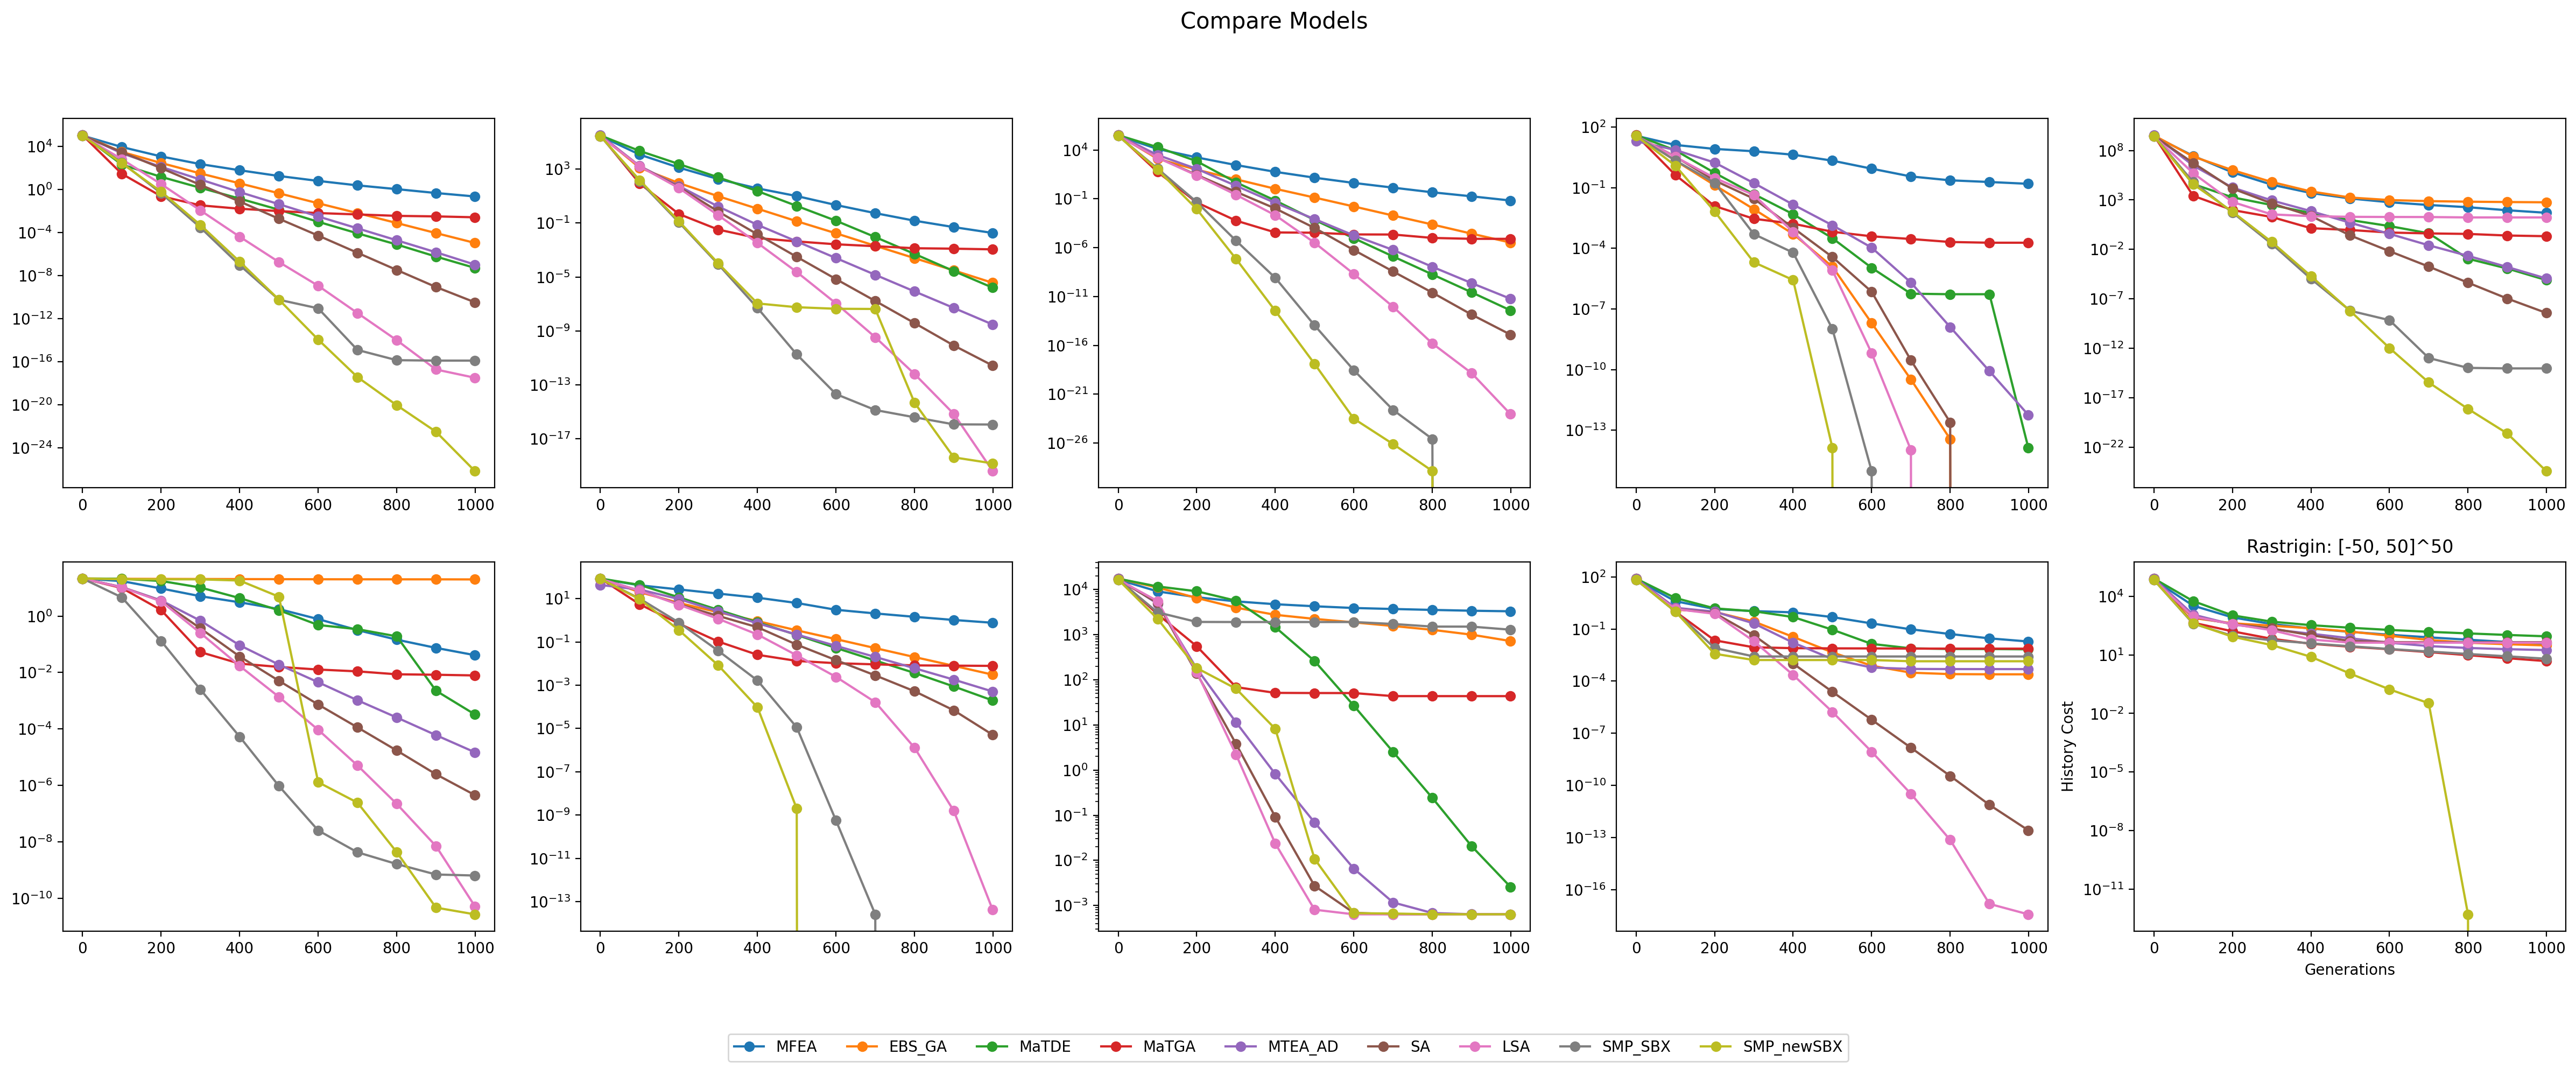

In [4]:
compare = CompareModel(
    models = [MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model, SA_model, LSA_model, SMP_sbx, SMP_newSBX],
    label= [...] * 7 + ['SMP_SBX', 'SMP_newSBX'],
)
compare.render(    
    shape = (2, 5),
    min_cost= 0,
    step= 100,
    yscale= 'log'
)

In [10]:
compare.compareResult()

,MFEA,EBS_GA,MaTDE,MaTGA,MTEA_AD,SA,LSA,MFEA_lib.model.SMP_MFEA,MFEA_lib.model.SMP_MFEA
Task0,0.2306803683118937,1.1041796512728456e-05,5.2448509840324785e-08,0.0026705872776819728,1.0609301724934813e-07,3.3061538714714826e-11,3.168912392798847e-18,1.2428302931217232e-16,(+)6.462348535570529e-27
Task1,0.018171437665116218,3.681032203235758e-06,1.6047725809275885e-06,0.001115356576805881,2.990552670377746e-09,2.7004188231793198e-12,(+)4.115767650271555e-20,1.1538255435790033e-16,1.4814434860609258e-19
Task2,0.06637609850485167,3.3058988094997382e-06,3.780454713321491e-13,7.99836824342369e-06,5.841638817660246e-12,1.2453502149219146e-15,8.854797474408491e-24,(+)0.0,(+)0.0
Task3,0.15509211361656364,(+)0.0,1.3263066634183172e-14,0.00018902136266731547,5.631051180898794e-13,(+)0.0,(+)0.0,(+)0.0,(+)0.0
Task4,50.71698610513365,580.4145475565334,8.054459884058472e-06,0.2174243104776917,1.1687145306498282e-05,3.866938484475334e-09,17.14577598003519,9.431997230585164e-15,(+)3.9219050836549434e-25
Task5,0.04081920302784129,19.878634231807037,0.0003277373502341104,0.00788099665294391,1.4935024698721951e-05,4.546695502168537e-07,5.24695250211001e-11,6.407936107658922e-10,(+)2.5816978184896772e-11
Task6,0.761665023855529,0.0030677093118668527,0.00019759556704077922,0.007821966536942615,0.0005110312939137884,5.111509141874911e-06,4.215767568841652e-14,(+)0.0,(+)0.0
Task7,3296.151781410698,722.3461222912298,0.0025821879342401767,43.47763931314948,0.0006367085414240136,0.0006363783330016303,(+)0.000636378324998077,1289.329574434013,0.0006389044672687305
Task8,0.019118154704695252,0.0002466442088243716,0.006801872064916456,0.007421096596115487,0.0004930758789514581,2.559175094063448e-13,(+)3.700743415417188e-18,0.0026272176497317613,0.0013958553045254544
Task9,36.08224289157316,30.49323695358462,89.16722368749038,4.796823959508992,17.626749155381347,44.540968098954075,42.21939907756904,6.345284095569246,(+)0.0


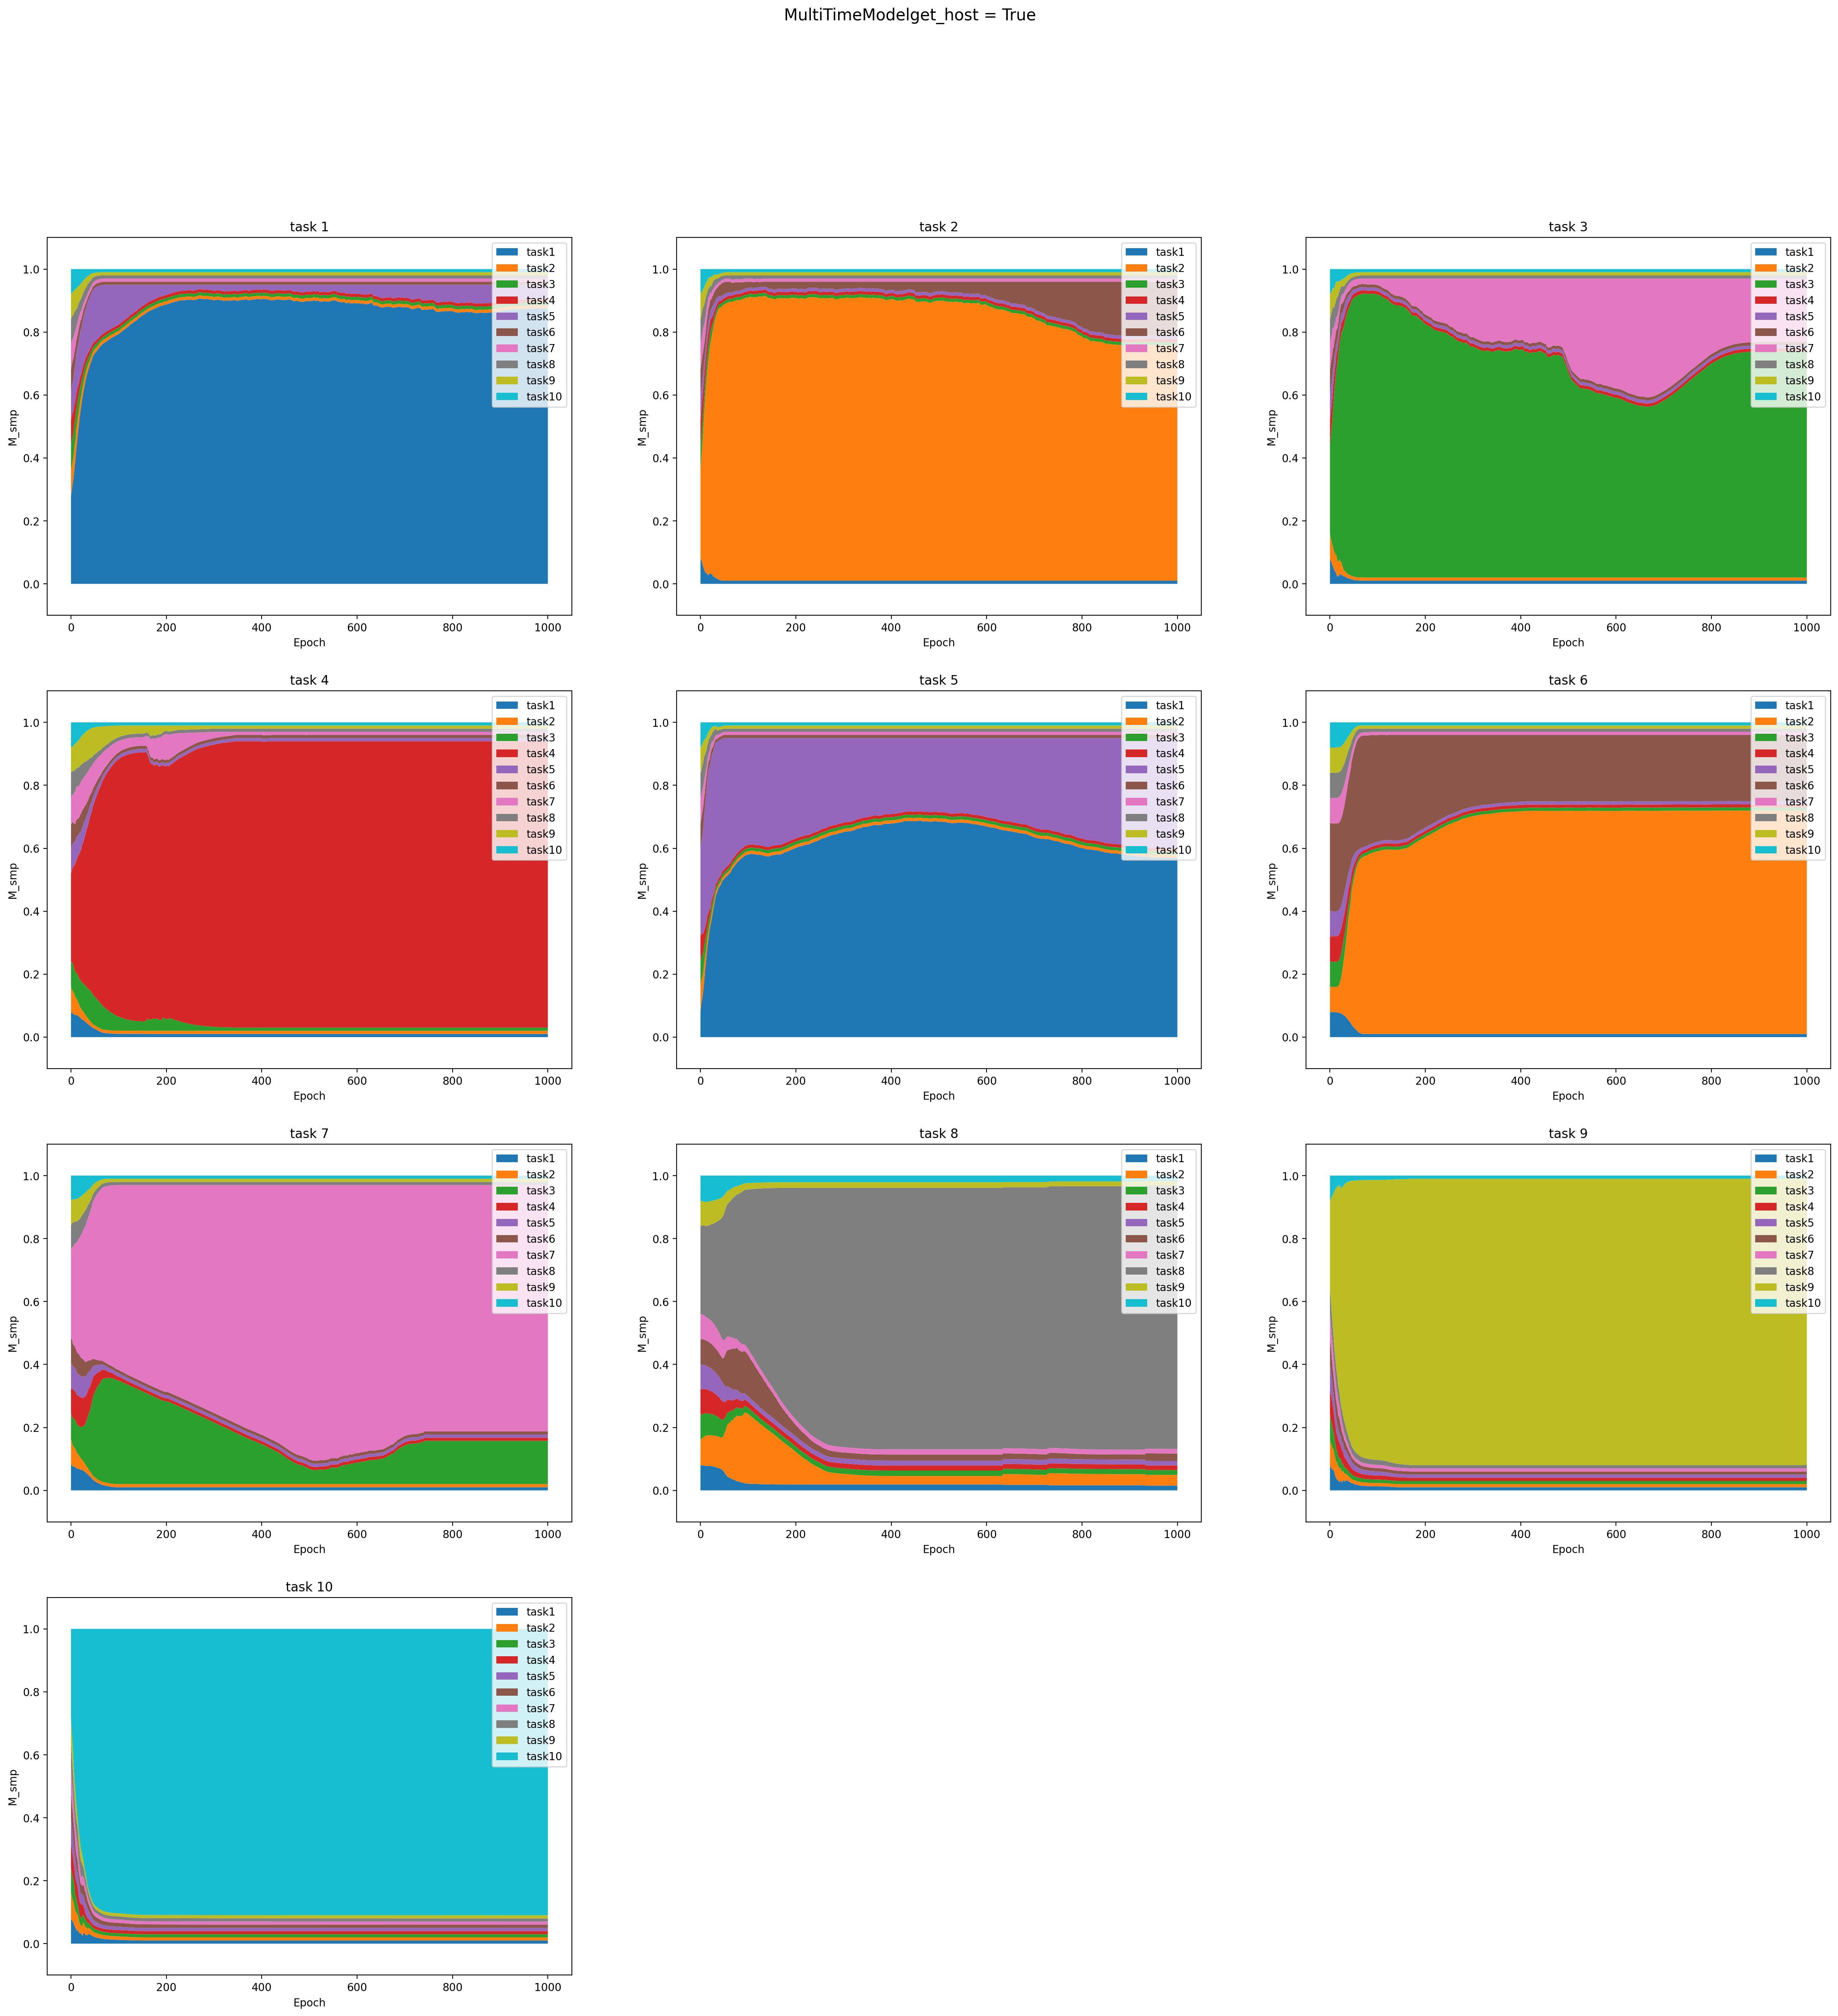

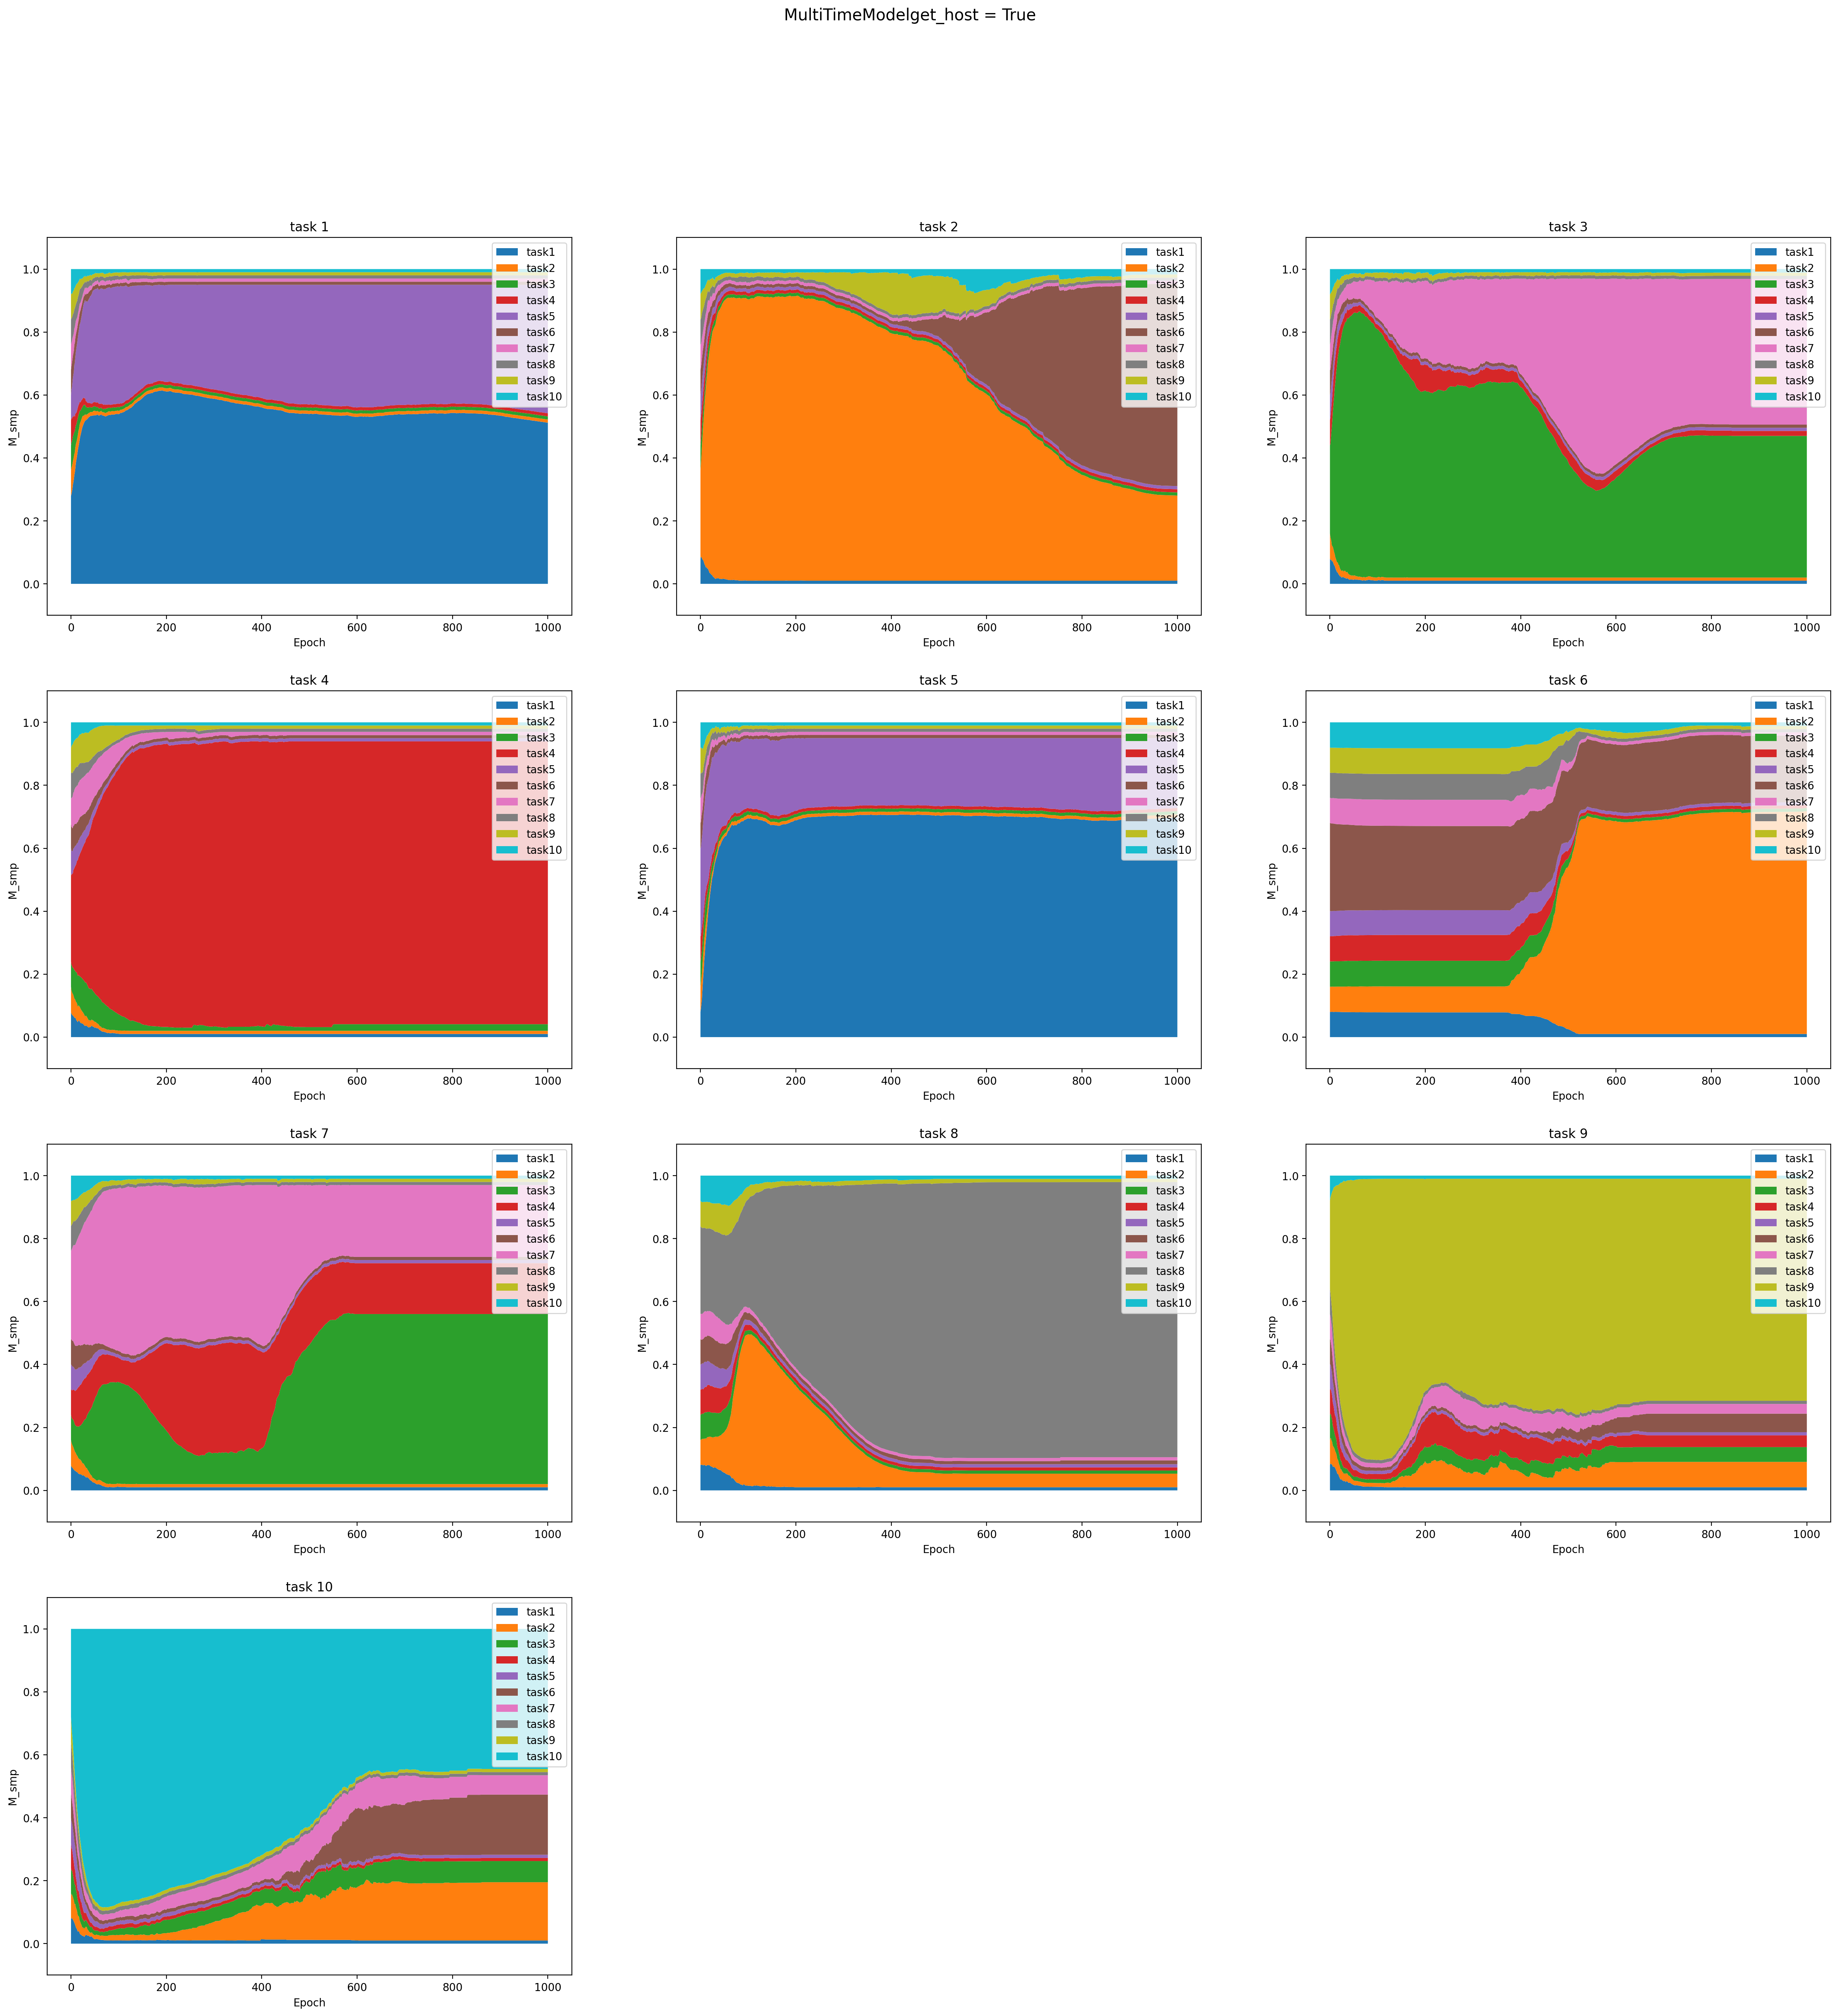

In [ ]:
SMP_sbx.render_smp(step = 1, get_host= True)
SMP_newSBX.render_smp(step = 1, get_host= True)
print()

30 times

In [ ]:
# smpModel = MultiTimeModel(model= SMP_MFEA)
# smpModel.compile(
#     tasks= cec17_10tasks,
#     crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
#     # mutation= NoMutation(),
#     mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
#     selection= ElitismSelection(random_percent= 0.),
# )
# smpModel.fit(
#     nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 20,
#     lr = 1.5, p_const_intra= 0.3, p_mutate= 0.,
#     nb_epochs_stop= 50, 
#     evaluate_initial_skillFactor= True
# )
# smpModel.run(
#     nb_run= 30,
#     save_path= './RESULTS/smpMFEA_cec17.mso'
# )

In [ ]:
# smpModel.render_history(shape = (2, 5), yscale= 'log')
# print()

In [ ]:
# smpModel.render_smp(step = 1, get_host= True)
# print()

##### GECCO20

In [ ]:
gecco20 = GECCO20_benchmark_50tasks.get_items(ID = 1)
smpModel = SMP_MFEA.model(seed = 0)
smpModel.compile(
    tasks= gecco20,
    # crossover= SBX_Crossover(nc = 2),
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    mutation = GaussMutation(scale = 0.1),
    selection= ElitismSelection(random_percent= 0.),
    search= SHADE()
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 20,
    lr = 2, p_const_intra= 0.2, p_mutate= 0., prob_search = 0.,
    nb_epochs_stop= 1000, swap_po= True,
    evaluate_initial_skillFactor= True
)

Time: 20m 41.22s  100 % [====================>]  Pop_size: 9.50E+02  ,  Cost: 2.96E-08  1.04E-15  1.96E-13  4.74E-15  8.37E-14  1.22E-17  1.51E-12  2.06E-14  1.10E-16  2.41E-11  3.00E-10  1.04E-10  1.57E-12  8.09E-12  8.21E-14  1.01E-17  3.89E-13  8.90E-15  6.87E-18  4.38E-13  4.78E-14  3.31E-14  1.82E-09  9.04E-20  7.33E-12  4.88E-14  3.61E-10  1.20E-13  2.29E-13  1.23E-16  6.12E-12  2.37E-18  5.24E-06  6.58E-15  2.25E-09  1.54E-12  3.31E-15  7.99E-09  9.22E-11  7.14E-18  7.08E-12  5.25E-16  1.26E-15  1.58E-14  5.15E-11  2.12E-08  2.56E-12  7.14E-11  9.59E-12  6.66E-16  ,  
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
[100052. 100052.  99858. 100710.  99180. 100688. 100044. 100176. 100852.
  99570.  99702.  99438. 100032.  99672.  99222.  99858.  99774.  99532.
 100750. 100384. 

[Genes: [0.4768405  0.47898709 0.45361217 0.53745116 0.53275561 0.46100577
  0.4720714  0.51911146 0.45590623 0.49587344 0.48763147 0.53567874
  0.45918167 0.52539007 0.53997309 0.47726749 0.47079102 0.53857954
  0.51324704 0.54622301 0.49738286 0.54633009 0.51746669 0.49063813
  0.51097941 0.53644606 0.45669034 0.5291141  0.49227189 0.49532581
  0.50022179 0.51297085 0.47245222 0.50157283 0.51719764 0.51878919
  0.54242686 0.46554257 0.48777849 0.48304146 0.49829167 0.53597508
  0.49782142 0.49634934 0.49252216 0.50897439 0.50020254 0.46736315
  0.49019355 0.48679407]
 Skill_factor: 0,
 Genes: [0.48127757 0.50134905 0.45237315 0.50661277 0.48475843 0.53756236
  0.4983359  0.52262941 0.45238476 0.50675483 0.49915251 0.54574627
  0.53761728 0.47451531 0.47964602 0.52766296 0.52361396 0.49017616
  0.50055678 0.50819237 0.52657185 0.53225982 0.50072571 0.54337457
  0.49734408 0.52530457 0.49227207 0.50005304 0.50764186 0.49516845
  0.52455583 0.54005983 0.50346593 0.52823774 0.50662212 0.

In [ ]:
# for id in range(6, 11, 1):
#     gecco20 = GECCO20_benchmark_50tasks.get_items(ID = 6)
#     smpModel = SMP_MFEA.model(seed = 0)
#     smpModel.compile(
#         tasks= gecco20,
#         # crossover= SBX_Crossover(nc = 2),
#         crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
#         mutation = GaussMutation(scale = 0.1),
#         selection= ElitismSelection(random_percent= 0.),
#         search= SHADE()
#     )
#     smpModel.fit(
#         nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 20,
#         lr = 2, p_const_intra= 0.2, p_mutate= 0., prob_search = 0.,
#         nb_epochs_stop= 1000, swap_po= True,
#         evaluate_initial_skillFactor= True
#     )


KeyboardInterrupt: 